# Sweet 🧈 Butter

Sweet Butter is a shortest paths problem by Greg Galperin from the [USACO training pages](https://train.usaco.org/):


> *Farmer John has discovered the secret to making the sweetest butter in all of Wisconsin: sugar. By placing a sugar cube out in the pastures, he knows the cows will lick it and thus will produce super-sweet butter which can be marketed at better prices. Of course, he spends the extra money on luxuries for the cows.*
>
>*FJ is a sly farmer. Like Pavlov of old, he knows he can train the cows to go to a certain pasture when they hear a bell. He intends to put the sugar there and then ring the bell in the middle of the afternoon so that the evening's milking produces perfect milk.*
>
>*FJ knows each cow spends her time in a given pasture (not necessarily alone). Given the pasture location of the cows and a description of the paths that connect the pastures, find the pasture in which to place the sugar cube so that the total distance walked by the cows when FJ rings the bell is minimized. FJ knows the fields are connected well enough that some solution is always possible.*


Rephrased:

> Given a connected undirected weighted graph with some active nodes, find the node that minimizes the total distance taken from every active node to it.

# Vocabulary
The key concepts for this problem:
- **Node**: pasture.
- **Weighted Edge**: length of direct connection between two pastures. 
- **Undirected**: edges can can be traversed in both directions.
- **Shortest Path**: minimal sum of edge weights to get from pasture A to pasture B. (Other problems may want this as number of edges or sequence of nodes taken.)
- **Adjacency List**: a data structure to represent a [graph](https://en.wikipedia.org/wiki/Graph_%28discrete_mathematics%29). Each node *a* in the graph is assigned an [adjacency list](https://en.wikipedia.org/wiki/Adjacency_list) that consists of nodes to where there is an edge from *a*.
- **Dijkstra's Algorithm**: an algorithm for finding the shortest paths from a starting node to all other nodes. 

Related concepts are:
- **Adjacency Matrix**: a data structure to represent a graph.
- **Floyd-Warshall Algorithm**: a shortest paths algorithm.

# Imports, Types, and Utility Functions

In [274]:
import matplotlib.pyplot as plt
import networkx          as nx
import PIL
from typing      import *
from collections import defaultdict

In [275]:
Cow = Dict[int, int]               # A cow and its pasture
Edge = Tuple[int, int]             # A pasture and connection length
Adj = DefaultDict[int, List[Edge]] # Adjacency list, e.g. {1: [(2, 1), (3, 5)], 2: [(1, 1), (3, 7), (4, 3)], ...}
Data = Tuple[Cow, Adj]             # Data read from input

In [276]:
def read_input(file: str='butter.in') -> Data:
    """Store cow locations and adjacency list from input data."""
    cow, adj = {}, defaultdict(list)
    with open(file) as f:
        C, V, E = map(int, f.readline().split())     # cows, vertices (nodes), edges
        for i in range(1, C + 1):
            cow[i] = int(f.readline())
        for _ in range(E):
            u, v, w = map(int, f.readline().split()) # undirected edge connecting u and v with weight w
            adj[u].append((v, w))
            adj[v].append((u, w))
    return cow, adj

In [277]:
def draw_graph(data: Data):
    """Visualize an adjacency list and show cows in each node."""
    cow, adj = data
    G = nx.Graph()
    for u in adj:
        G.add_node(u, cow=0)
        for edge in adj[u]:
            v, w = edge[0], edge[1]
            G.add_edge(u, v, weight=w)
    for i in cow:
        G.nodes[cow[i]]['cow'] += 1

    # draw nodes
    layout = nx.spring_layout(G)             # positions for all nodes
    nx.draw(G, pos=layout, with_labels=True, node_color="lightgreen")

    # draw cow attribute label above nodes
    pos_attrs = {}                           # positions for cow labels
    for u, xy in layout.items(): 
        pos_attrs[u] = (xy[0], xy[1] + 0.0788)
    cow_labels = {}                    
    for u, val in nx.get_node_attributes(G, 'cow').items():
        cow_labels[u] = "🐮 x" + str(val) 
    nx.draw_networkx_labels(G, pos=pos_attrs, labels=cow_labels)

    # draw edge weights
    weight_labels = nx.get_edge_attributes(G, "weight")
    nx.draw_networkx_edge_labels(G, pos=layout, edge_labels=weight_labels)
    plt.show()

# Input
Here is the sample input. Tougher inputs will be tested. An extreme scenario might have:

- 500 cows
- 800 pastures
- 1,450 connections (each length 255)

The first line contains the number of cows, pastures, and edges respectively. The next cow number of lines is each cow and their pasture. Followed by edge number of lines containing connected pastures and the distance between them. 

>3 4 5<br> 
2<br>
3<br>
4<br>
1 2 1<br>
1 3 5<br>
2 3 7<br>
2 4 3<br>
3 4 5

Cows and their pasture are stored in a dictionary and an adjacency list stores the graph of pastures and connections.

In [278]:
read_input()

({1: 2, 2: 3, 3: 4},
 defaultdict(list,
             {1: [(2, 1), (3, 5)],
              2: [(1, 1), (3, 7), (4, 3)],
              3: [(1, 5), (2, 7), (4, 5)],
              4: [(2, 3), (3, 5)]}))

# Visualizing input

Let's draw the graph showing the pasture number, length of each connection, and grazing cows.

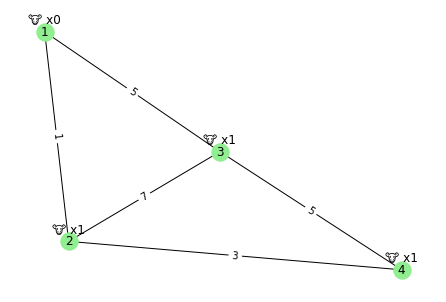

In [279]:
draw_graph(read_input())

# Output

We want to (efficiently) find the minimum distance cows must walk to a pasture with a sugar cube.

For the sample input shown above the answer is: **8**

Putting the cube in pasture 4 means: cow 1 walks 3 units; cow 2 walks 5 units; cow 3 walks 0 units -- a total of 8.


# Shortest Paths: Dijkstra
## sample input
## test case 9
# Floyd-Warshall
## tradeoffs: memory, runtime